# Análisis Exploratorio de Datos (EDA) - Detector de Reseñas Falsas
# Exploratory Data Analysis (EDA) - Fake Review Detector

This notebook will perfom the EDA for the "Fake Review Dataset" from Kaggle.

Objectives:
- Understand the structure and data quality.
- Analize the distribution of the classes (fake vs. real)
- Explore text patterns (length, common words)
- Visualize insights to guide the preprocess and trainning.

Dataset: https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Plot styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

# Data Load
df = pd.read_csv('..\\data\\raw\\fake reviews dataset.csv')

print("Successfully loaded dataset.")
print(f"Dataset shape: {df.shape}")


Successfully loaded dataset.
Dataset shape: (40432, 4)


## 1. Initial Data Structure Exploration

In [2]:
# First rows
print("First 5 rows:")
print(df.head())

# General Information
print("\nDataset Info:")
print(df.info())

#Data Type
print("\nDatatypes:")
print(df.dtypes)

# Statistical Description
print("\nStatistical Description:")
print(df.describe())

# Verify null values
print("\nNull Values:")
print(df.isnull().sum())

# Columns names
print("\nDataset Columns:")
print(df.columns.tolist())


First 5 rows:
             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None

Dataty

## 2. Classes Distribution (Fake vs. Real)

In [3]:
#Labels
print("\nLabel Classes:")
print(df["label"].unique())



Label Classes:
['CG' 'OR']


The 'label' column uses 'OR' for original reviews and 'CG' for fake (computer generated) reviews

Distribución de clases:
label
CG    20216
OR    20216
Name: count, dtype: int64


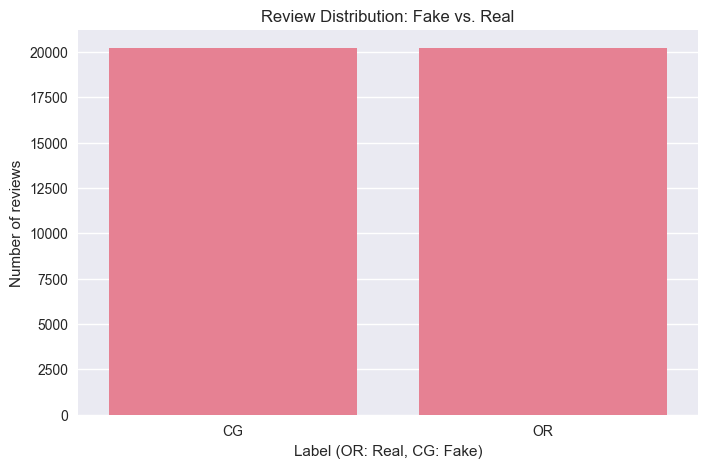


Real reviews percentage (OR): 50.00%

Fake reviews percentage (CG): 50.00%


In [4]:
# Set column name
label_col = 'label'

# Verify distribution
class_distribution = df[label_col].value_counts()
print("Distribución de clases:")
print(class_distribution)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=label_col)
plt.title('Review Distribution: Fake vs. Real')
plt.xlabel('Label (OR: Real, CG: Fake)')
plt.ylabel('Number of reviews')
plt.show()

# Percentage
print(f"\nReal reviews percentage (OR): {class_distribution['OR']/len(df)*100:.2f}%")
print(f"\nFake reviews percentage (CG): {class_distribution['CG']/len(df)*100:.2f}%")

## 3. Review Text Analysis
- Review lenghts.
- Common words.
- Cloud words.

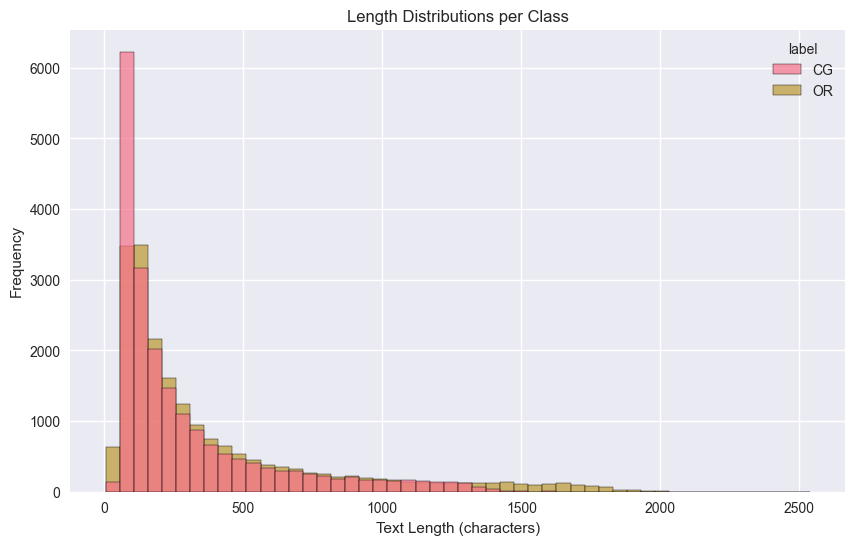

Length Statistics per Class:
         count        mean         std   min    25%    50%    75%     max
label                                                                    
CG     20216.0  296.193461  297.854473   4.0   93.0  169.0  370.0  1665.0
OR     20216.0  383.663336  403.528695  27.0  117.0  217.0  483.0  2538.0


In [5]:
# Set text columns
text_col = 'text_'

# Basic function to clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    return text

df['clean_text'] = df[text_col].apply(clean_text)
df['text_length'] = df['clean_text'].apply(len)

# Length distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue=label_col, bins=50, alpha=0.7)
plt.title('Length Distributions per Class')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Length Statistics
print("Length Statistics per Class:")
print(df.groupby(label_col)['text_length'].describe())

Top 20 words in real reviews (OR):
one: 6810
great: 5774
like: 5241
book: 5218
good: 4744
would: 4325
well: 4218
love: 3942
really: 3534
get: 3524
read: 3259
use: 2978
time: 2897
story: 2865
much: 2852
little: 2826
dont: 2481
also: 2360
first: 2161
even: 2114

Top 20 words in fake reviews (CG):
great: 10645
book: 9783
good: 9451
love: 6863
story: 6761
one: 6585
well: 6061
would: 6037
read: 5609
little: 5318
recommend: 4765
characters: 4696
like: 4184
movie: 4096
bought: 3981
loves: 3639
small: 3466
also: 3361
nice: 3116
easy: 3084


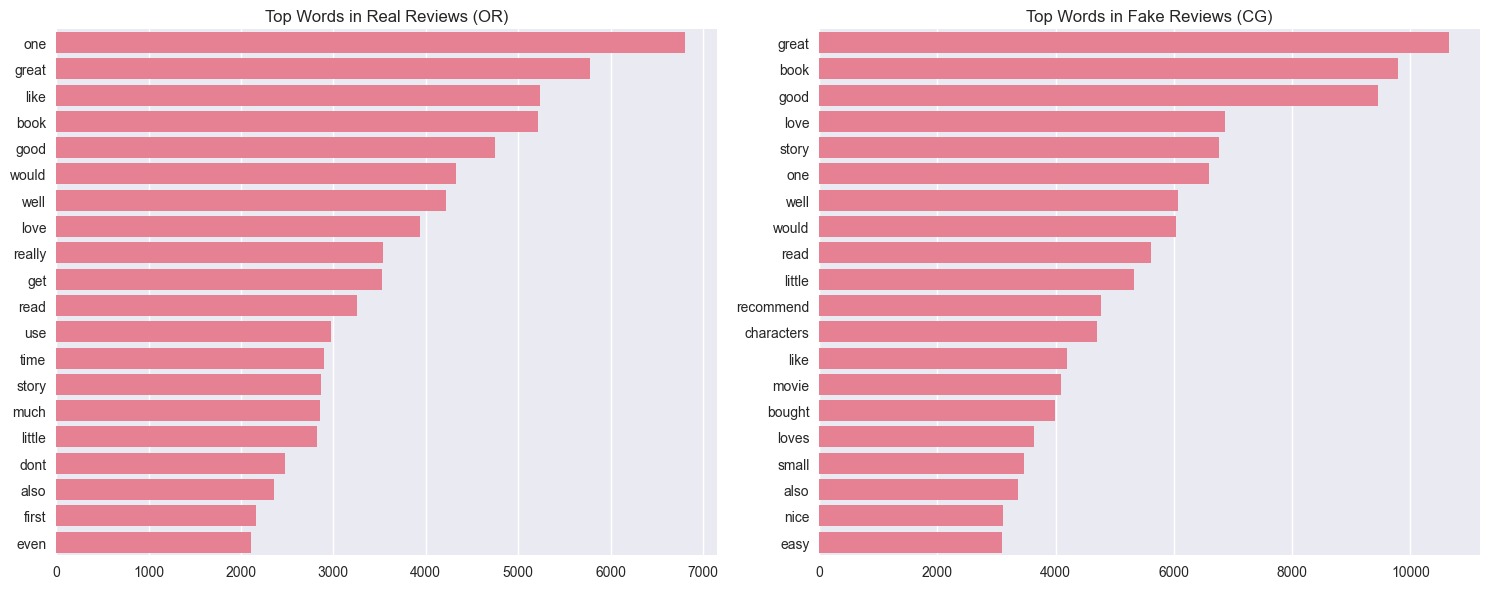

In [6]:
# Common words per Class
stop_words = set(stopwords.words('english'))

def get_top_words(text_series, top_n=20):
    words = []
    for text in text_series:
        tokens = nltk.word_tokenize(text)
        words.extend([word for word in tokens if word not in stop_words and len(word) > 2])
    return Counter(words).most_common(top_n)

# Real reviews words ('OR')
real_words = get_top_words(df[df[label_col] == 'OR']['clean_text'])
print("Top 20 words in real reviews (OR):")
for word, count in real_words:
    print(f"{word}: {count}")

# Fake review words ('CG')
fake_words = get_top_words(df[df[label_col] == 'CG']['clean_text'])
print("\nTop 20 words in fake reviews (CG):")
for word, count in fake_words:
    print(f"{word}: {count}")

# Contrastive visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Real
real_counter = dict(real_words)
sns.barplot(y=list(real_counter.keys()), x=list(real_counter.values()), ax=ax1)
ax1.set_title('Top Words in Real Reviews (OR)')

# Fake
fake_counter = dict(fake_words)
sns.barplot(y=list(fake_counter.keys()), x=list(fake_counter.values()), ax=ax2)
ax2.set_title('Top Words in Fake Reviews (CG)')

plt.tight_layout()
plt.show()

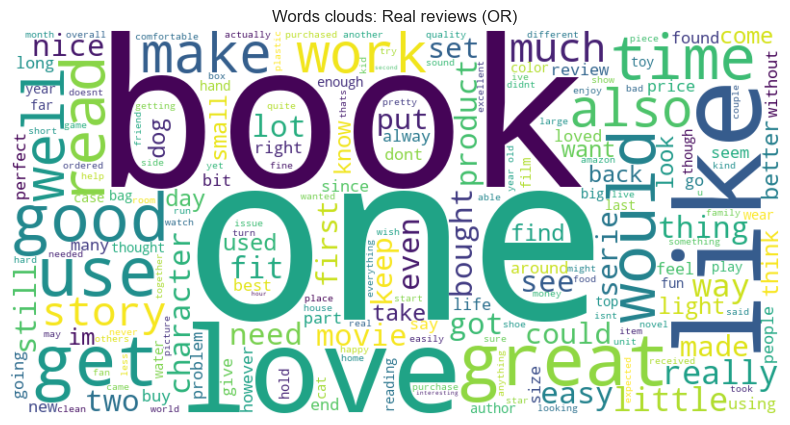

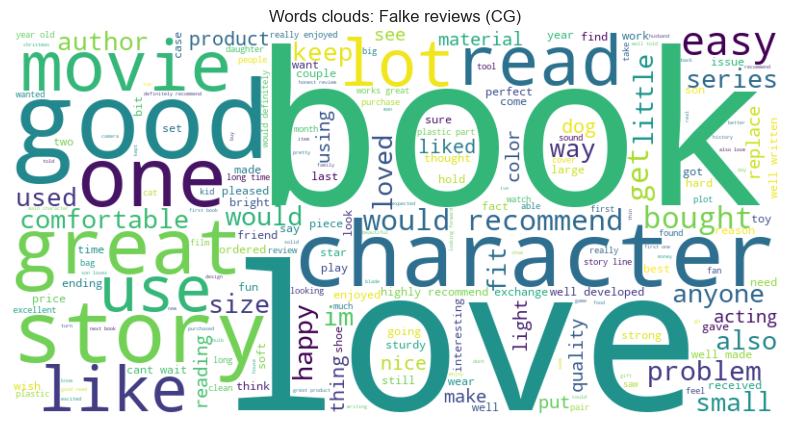

In [7]:
# Words clouds
def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Nube para reseñas reales ('OR')
generate_wordcloud(df[df[label_col] == 'OR']['clean_text'], 'Words clouds: Real reviews (OR)')

# Nube para reseñas falsas ('CG')
generate_wordcloud(df[df[label_col] == 'CG']['clean_text'], 'Words clouds: Falke reviews (CG)')

## 4. Rating and Category Analysis
- Class Ranking Distribution.
- Class Basic Distribution.

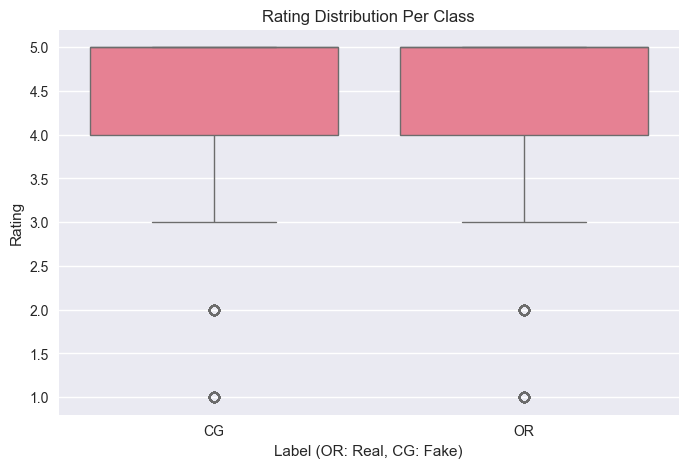

Correlation between label and rating:
           label_num    rating
label_num   1.000000  0.002896
rating      0.002896  1.000000


In [8]:
# Ratings Distributions
if 'rating' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=label_col, y='rating')
    plt.title('Rating Distribution Per Class')
    plt.xlabel('Label (OR: Real, CG: Fake)')
    plt.ylabel('Rating')
    plt.show()
    
    # Correlation
    df['label_num'] = df[label_col].map({'OR': 0, 'CG': 1})  # 0: Real, 1: Fake
    print("Correlation between label and rating:")
    print(df[['label_num', 'rating']].corr())
    
    # Clean temporal column
    df.drop('label_num', axis=1, inplace=True)
else:
    print("There's no 'rating' column in the dataset.")

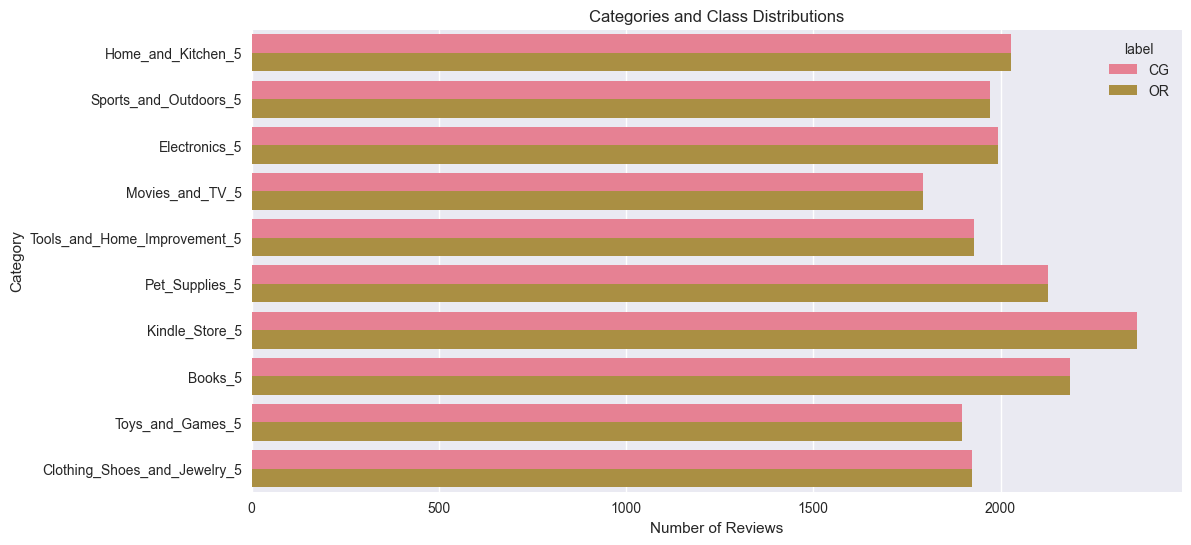

In [9]:
# Categories Distribution
if 'category' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='category', hue=label_col)
    plt.title('Categories and Class Distributions')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Category')
    plt.show()
else:
    print("There's no 'category' column in the dataset.")

## 5. Insights y Próximos Pasos
- **Classes Balance**: The dataset is balanced (~50/50 OR/CG), this is ideal for a training without immediate oversampling
- **Lengths**: The fake reviews (CG) have a tendency to be shorter, this can be used as an additional feature.
- **Common Words**: There are a difference in vocabulary.
- **Ratings**: The mayority are 5.0; theres a weak correlation with the label
- **Preprocess**: Clean text (remove stop words, lemmatization) before training antes de entrenar.Encode label 0/1 for ML training.
- **Próximos pasos**:
  1. Implement preprocess in `src/utils/data.py`.
  3. Train the model in `src/train.py`.

Guarda este notebook y commitea cambios: `git add notebooks/exploration.ipynb` y `git commit -m "Notebook de EDA actualizado con estructura real del CSV"`.